# Importing relevant libraries and modules

In [242]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Scraping web to get current COVID-19 data for India

In [243]:
url= 'https://www.mohfw.gov.in/'
page= requests.get(url)
response= BeautifulSoup(page.content, 'html.parser')
results= response.find(id='state-data')
print(results.prettify())

<section class="site-update" id="state-data">
 <div class="container">
  <div class="row">
   <div class="col-xs-12">
    <h2>
     <a class="open-table" href="#">
      COVID-19 Statewise Status (Click to expand)
     </a>
    </h2>
    <div class="data-table table-responsive">
     <table border="1" cellpadding="1" cellspacing="1" class="table table-striped" style="font-weight:bold">
      <thead>
       <tr>
        <th>
         <strong>
          S. No.
         </strong>
        </th>
        <th>
         <strong>
          Name of State / UT
         </strong>
        </th>
        <th>
         <strong>
          Total Confirmed cases (Including 76 foreign Nationals)
         </strong>
        </th>
        <th>
         <strong>
          Cured/Discharged/
          <br/>
          Migrated
         </strong>
        </th>
        <th>
         <strong>
          Death
         </strong>
        </th>
       </tr>
      </thead>
      <tbody>
       <tr>
        <td>
        

In [244]:
title= results.h2.text.split('(')[0].strip()
first= results.tbody.find_all('tr')[:-3]

### Converting extracted data to form Dataframe 

In [245]:
Name_of_State_UT= []
Total_Confirmed_cases= []
Cured= []
Death= []
for second in first:
    third= second.find_all('td')
    Name_of_State_UT.append(third[1].text.strip())
    Total_Confirmed_cases.append(third[2].text.strip())
    Cured.append(third[3].text.strip())
    Death.append(third[4].text.strip())

In [246]:
data= {'Name of State':Name_of_State_UT , 'Total Confirmed cases':Total_Confirmed_cases ,'Cured':Cured, 'Death':Death }
df= pd.DataFrame(data= data)
df=df.astype({'Total Confirmed cases':'int32', 'Cured':'int32', 'Death':'int32'})
df= df.sort_values('Total Confirmed cases', ascending=False)
df1= df.iloc[6:].sum()
df=df.iloc[:6]
df= df.append({'Name of State':'Rest of India', 'Total Confirmed cases':df1['Total Confirmed cases'], 'Cured':df1['Cured'], 'Death':df1['Death']}, ignore_index=True)
df= df.set_index('Name of State')
df

,Total Confirmed cases,Cured,Death
Name of State,,,
Maharashtra,2916,295,187
Delhi,1578,40,32
Tamil Nadu,1242,118,14
Rajasthan,1023,147,3
Madhya Pradesh,987,64,53
Gujarat,766,64,33
Rest of India,3868,761,92


### Plotting the Dataset

<IPython.core.display.Javascript object>


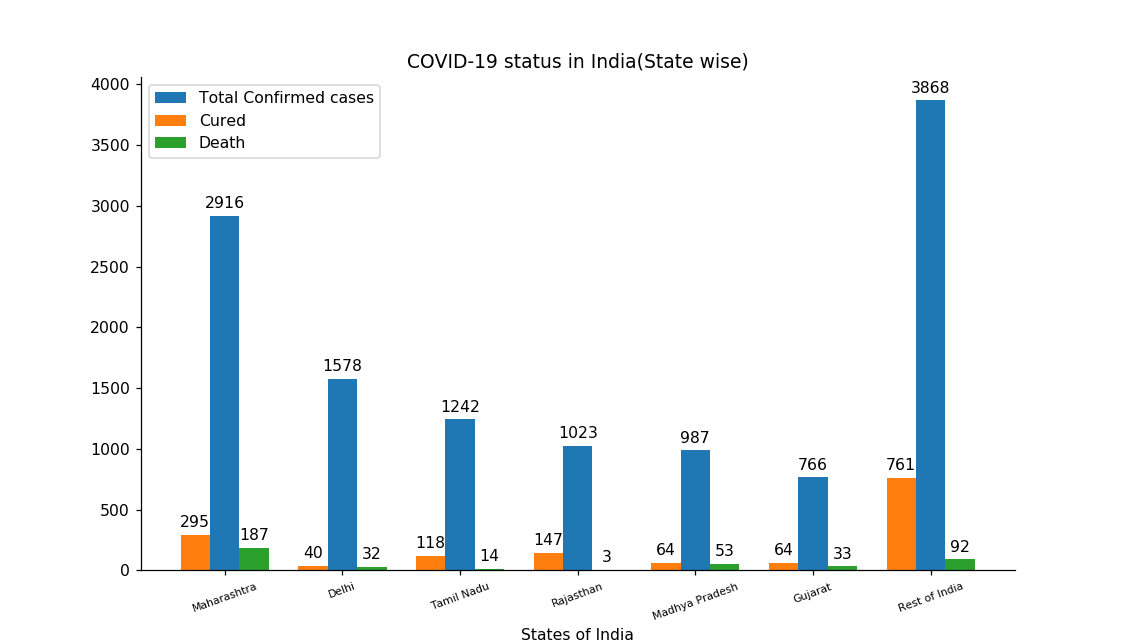

In [247]:
%matplotlib notebook
x= np.arange(2, 2*len(df['Total Confirmed cases'])+1, 2)
plt.figure()
width=0.5
bar1= plt.bar(x, df['Total Confirmed cases'], width, label='Total Confirmed cases')
bar2= plt.bar(x-width, df['Cured'], width, label='Cured')
bar3= plt.bar(x+width, df['Death'], width, label='Death')
plt.legend()
plt.xlabel('States of India')
plt.title('COVID-19 status in India(State wise)')
plt.xticks(x,labels=list(df.index), fontsize='x-small', rotation=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [248]:
def text(bars):
    for bar in bars:
        height= bar.get_height()
        plt.gca().annotate('{}'.format(height),xy=(bar.get_x()+ (bar.get_width()/2), height),
                           xytext=(0, 3), textcoords="offset points",ha='center', va='bottom')

text(bar1)
text(bar2)
text(bar3)        
        